Classification of tumors given numerical measurements of tumors 

In [ ]:
from pandas import read_csv
data = read_csv('breast-cancer-wisconsin.data')
data.describe
print(data.dtypes)
from collections import Counter
from numpy import round
import numpy as np
target  = data.values[:,-1]
counter = Counter(target)
print(counter)
for v,c in counter.items():
  print('{}% are {}'.format(round(c/len(target)*100,1),v))
print('4 is malignant\n2 is benign')

In [ ]:
#Replacing missing entries with average
column = data['1.3'] 
subset = column[column!='?']
print(round(np.mean(subset.astype(int))))
average = np.mean(subset.astype(int))
data['1.3'].replace({"?": average}, inplace=True)
data['1.3']=data['1.3'].astype('int')
print(data.dtypes)

4.0
1000025    int64
5          int64
1          int64
1.1        int64
1.2        int64
2          int64
1.3        int64
3          int64
1.4        int64
1.5        int64
2.1        int64
dtype: object


(array([457.,   0., 241.]),
 array([2.        , 2.66666667, 3.33333333, 4.        ]),
 <a list of 3 Patch objects>)

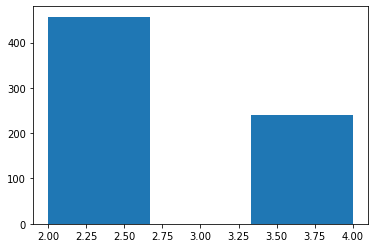

In [ ]:
data_v = data.values

from matplotlib import pyplot as plt
plt.hist(data_v[:,len(data.columns)-1],bins=3)


In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
#scatter_matrix(data,figsize=(12,12))


NameError: ignored

In [2]:
from sklearn.preprocessing import LabelEncoder
X = data.values[:,1:-1]
y = data.values[:,-1]
y = LabelEncoder().fit_transform(y)
print(y)


NameError: ignored

In [ ]:
print(X)

[[ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 [ 6  8  8 ...  3  7  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,
                                                 random_state=1)
print(X_train.shape,X_test.shape,X.shape) #80% training #20% testing

(558, 9) (140, 9) (698, 9)


In [ ]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[ 1.93356726  2.17555154  1.21986044 ...  2.65691374  2.28061534
   0.81352217]
 [-1.2130221  -0.7240291  -0.77432547 ... -0.59698556  0.01046154
  -0.34302655]
 [ 1.93356726  1.20902466  1.21986044 ...  0.21648927 -0.63815383
   0.23524781]
 ...
 [ 1.58394622  0.24249778  0.5551318  ...  0.21648927  1.63199997
  -0.34302655]
 [ 1.93356726  1.53120029  1.55222476 ...  0.21648927  1.63199997
   4.86144269]
 [ 0.18546206  0.24249778  0.22276748 ...  0.62322668  0.98338459
  -0.34302655]]


In [ ]:

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier(n_estimators=100,criterion='entropy',
                                           random_state=0)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.965909 (0.016970)
LDA: 0.956948 (0.021584)
KNN: 0.960584 (0.019210)
CART: 0.931883 (0.019348)
NB: 0.958799 (0.019609)
QDA: 0.955227 (0.019908)
SVM: 0.964156 (0.017859)
RFC: 0.962403 (0.020246)


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
scores = model.predict(X_test)
acc = accuracy_score(y_test,scores)
print(acc)

0.9642857142857143


Text(0, 0.5, 'Accuracy')

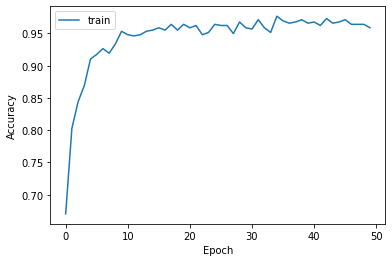

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet201
from matplotlib import pyplot 
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(units=1024,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=512,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=256,activation='relu'),
                                   tf.keras.layers.Dropout(.2),
                                   tf.keras.layers.BatchNormalization(),
                                  
                                   tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001,momentum=0.0),loss='binary_crossentropy',metrics=['accuracy'])
	# fit model
history = model.fit(X_train,y_train, epochs=50, verbose=0)
	# plot learning curves
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")
#print(max(history.history['accuracy']))
#pyplot.title('momentum='+str(momentum), pad=-80)
#model.fit(X_train,y_train,epochs=3,steps_per_epoch=10)

In [ ]:
scores = model.predict(X_test)
rs=[]
for index,i in enumerate(scores):
  if i >0.5:
    scores[index]=1
  else:
    scores[index]=0

acc = accuracy_score(y_test,scores)
print(acc)

0.9785714285714285


In [ ]:

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
  model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(units=1024,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=512,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=256,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                  
                                   tf.keras.layers.Dense(units=1,activation='sigmoid')
                                   ])
  
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001,momentum=momentum),loss='binary_crossentropy',metrics=['accuracy'])
	# fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=20, verbose=0)
	# plot learning curves
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.title('momentum='+str(momentum), pad=-80)

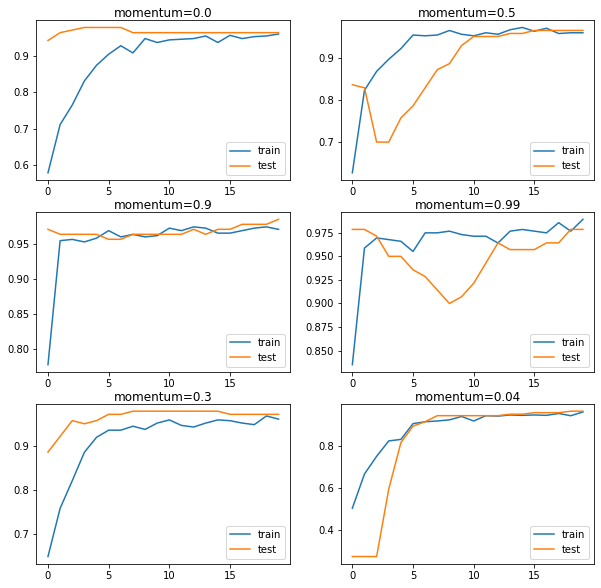

In [ ]:

f, axs = pyplot.subplots(2,2,figsize=(15,15))
f.set_figheight(10)
f.set_figwidth(10)


# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99,0.3,.04]
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 320 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a momentum
	fit_model(X_train, y_train, X_test, y_test, momentums[i])
# show learning curves
pyplot.show()